<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/kaggle_House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'train.csv'
df = pd.read_csv(filename)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [ ]:
df.shape

(1460, 81)

In [ ]:
# 欠損値確認
df.info()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.set_option('display.max_rows', 100)
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [ ]:
print(pd.get_option("display.max_rows"))

100


In [3]:
df.columns.shape

(81,)

In [4]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [5]:
# 欠損値の多いカラムを削除
df = df.drop('LotFrontage', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('FireplaceQu', axis=1)
df = df.drop('PoolQC', axis=1)
df = df.drop('Fence', axis=1)
df = df.drop('MiscFeature', axis=1)

In [6]:
df = df.dropna()

In [7]:
df.shape

(1338, 75)

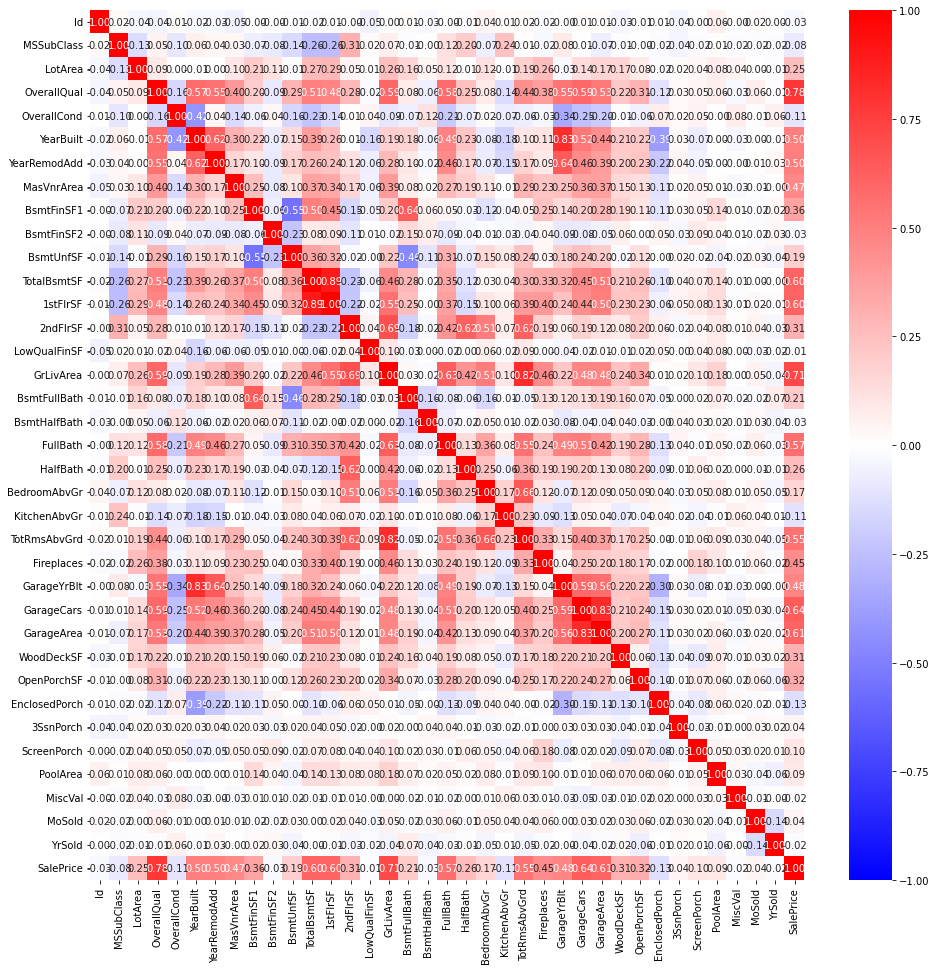

In [ ]:
fig=plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='bwr', fmt='.2f', vmax=1, vmin=-1, center=0)

In [8]:
def reg_plot(x,y):
    sns.regplot(x=x, y=y, data=df)
    plt.show()

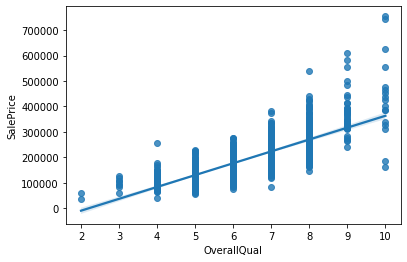

In [9]:
reg_plot('OverallQual', 'SalePrice')

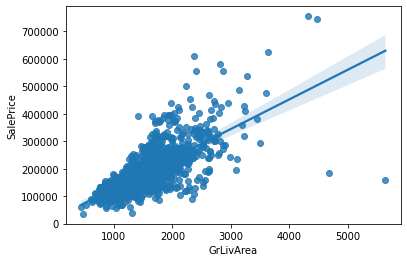

In [10]:
reg_plot('GrLivArea', 'SalePrice')

In [11]:
columns = df.columns

In [12]:
df[columns[0]].dtypes

dtype('int64')

In [13]:
# object型のカラムをdfから取り除く
for column in columns:
    if df[column].dtypes == object :
        df = df.drop(column, axis=1)

In [14]:
# 相関性の低いカラムを削除
columns = df.columns
for column in columns:
    corr_v = df.corr()[column]['SalePrice']
    print(corr_v)
    if corr_v < 0.5 and corr_v > -0.5:
        df = df.drop(column, axis=1)

-0.03047303628015024
-0.07959851790075388
0.2547573502139699
0.7835456113843237
-0.1086270972695443
0.504297175093091
0.5014353821077956
0.46581143360024846
0.35967663312618064
-0.031225787844299704
0.1916888789020209
0.6020422814414277
0.6047144846292783
0.31135402669959245
-0.00999239700593434
0.7117061511024302
0.20969465592752243
-0.03017500037561527
0.5693126295659892
0.2581749248797554
0.16926554693331156
-0.1114081974082277
0.5518206950104778
0.4454344326389212
0.48172978591824045
0.6401543580531925
0.6075353838509889
0.30598288316822747
0.3227857346419753
-0.12738527654209783
0.04215866955782426
0.0966239807980718
0.091881076190269
-0.016989857604916444
0.041309605129427975
-0.02045101634599536
1.0


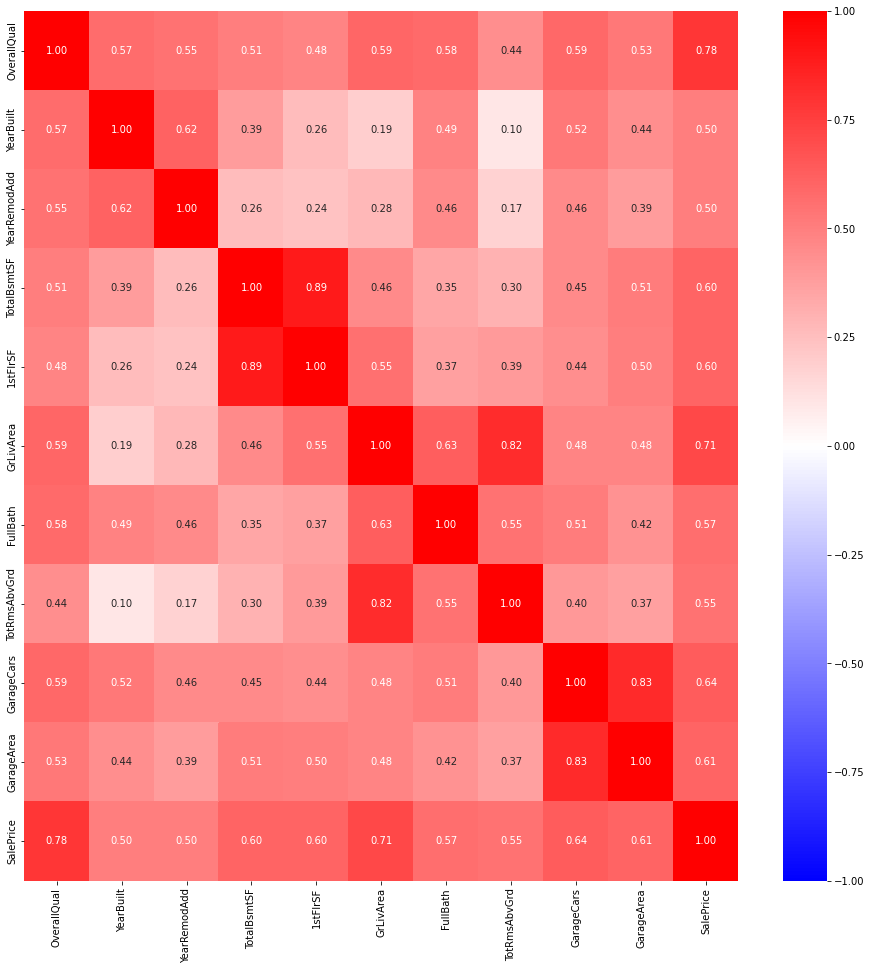

In [15]:
fig=plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='bwr', fmt='.2f', vmax=1, vmin=-1, center=0)

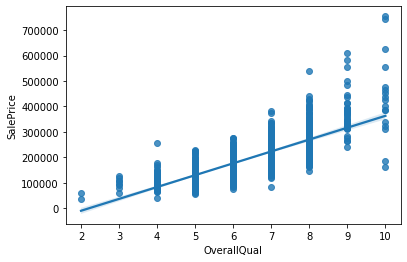

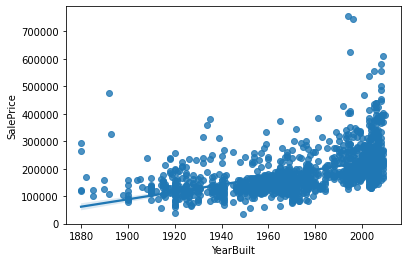

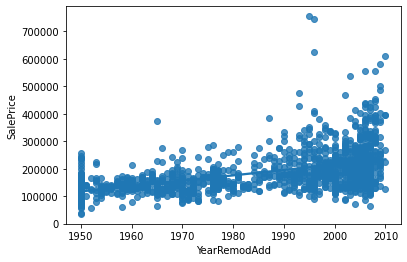

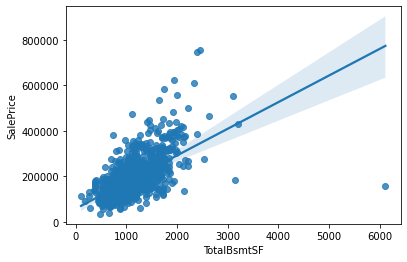

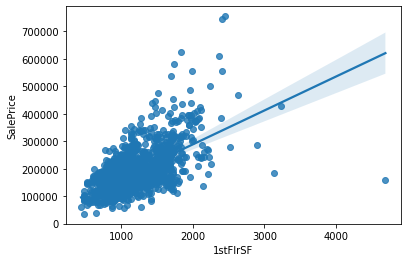

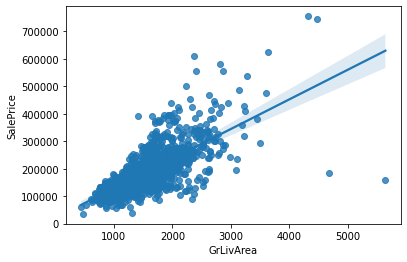

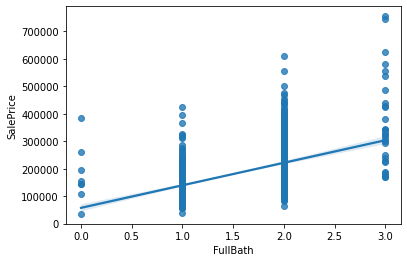

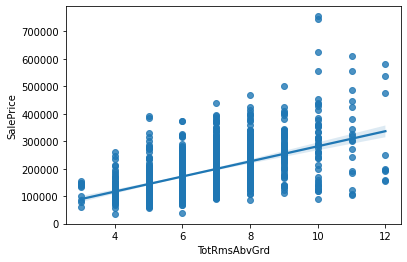

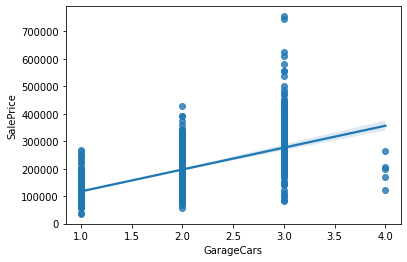

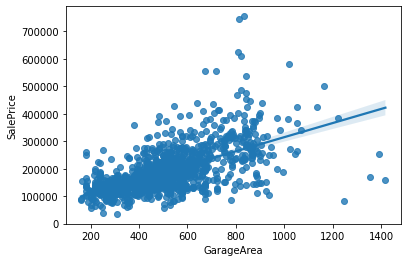

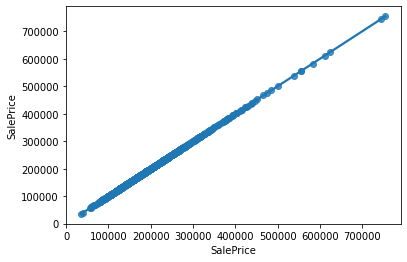

In [16]:
columns = df.columns
for column in columns:
    reg_plot(column, 'SalePrice')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
t = df['SalePrice'].values
X = df.drop(labels=['SalePrice'], axis=1)
X_train, X_test,t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0) 

In [19]:
LR_model = LinearRegression()
LR_model.fit(X_train, t_train)

LinearRegression()

In [20]:
print(f'train score:{LR_model.score(X_train, t_train)}')
print(f'test score:{LR_model.score(X_test, t_test)}')

train score:0.8280306935154924
test score:0.5530603472597755


In [21]:
train_score = []
test_score = []
ttl_score = []

for i in range(0,30):
    X_train, X_test,t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=i)
    LR_model = LinearRegression()
    LR_model.fit(X_train, t_train)
    print(i)
    print(f'train score:{LR_model.score(X_train, t_train)}')
    train_score.append(LR_model.score(X_train, t_train))
    print(f'test score:{LR_model.score(X_test, t_test)}')
    test_score.append(LR_model.score(X_test, t_test))
    print(LR_model.score(X_train, t_train)+LR_model.score(X_test, t_test))
    ttl_score.append(LR_model.score(X_train, t_train)+LR_model.score(X_test, t_test))
    print('---- state_1 **** done ----')

0
train score:0.8280306935154924
test score:0.5530603472597755
1.381091040775268
---- state_1 **** done ----
1
train score:0.8280159403134109
test score:0.5731766668090668
1.4011926071224776
---- state_1 **** done ----
2
train score:0.7747410938976298
test score:0.7328740008288237
1.5076150947264535
---- state_1 **** done ----
3
train score:0.7475760177278155
test score:0.7802406853418613
1.5278167030696768
---- state_1 **** done ----
4
train score:0.7548156746325805
test score:0.78142123062781
1.5362369052603904
---- state_1 **** done ----
5
train score:0.7953530790631855
test score:0.6446720946206581
1.4400251736838436
---- state_1 **** done ----
6
train score:0.7711703328211457
test score:0.7455787462978293
1.5167490791189748
---- state_1 **** done ----
7
train score:0.8007347655539664
test score:0.6245302183252095
1.4252649838791758
---- state_1 **** done ----
8
train score:0.7907786855429098
test score:0.7077636278256734
1.4985423133685831
---- state_1 **** done ----
9
train score

In [23]:
df_result = pd.DataFrame()
df_result['train_score'] = train_score
df_result['test_score'] = test_score
df_result['ttl_score'] = ttl_score
df_result.head(3)

# 行で取り込んで転置でもいける
# df_result = pd.DataFrame([train_score, test_score, ttl_score])
# df_result.T.tail()

,train_score,test_score,ttl_score
0,0.828031,0.553060,1.381091
1,0.828016,0.573177,1.401193
2,0.774741,0.732874,1.507615


In [24]:
df_result.max()

train_score    0.828031
test_score     0.831282
ttl_score      1.570787
dtype: float64

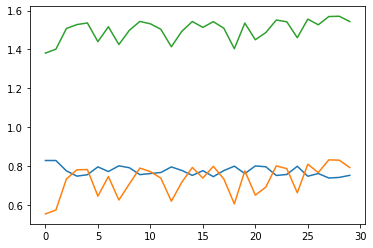

In [25]:
plt.plot(df_result.index, df_result['train_score'])
plt.plot(df_result.index, df_result['test_score'])
plt.plot(df_result.index, df_result['ttl_score'])
plt.show()

In [32]:
df_sub = pd.read_csv('test.csv')
X_sub=df_sub[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
df_sub.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [33]:
X_sub.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64

In [35]:
# 欠損値を平均で埋め、X_subを生成
X_sub = X_sub.fillna(df.mean())

In [36]:
X_train, X_test,t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=27) 
LR_model = LinearRegression()
LR_model.fit(X_train, t_train)
print(f'train score:{LR_model.score(X_train, t_train)}')
print(f'test score:{LR_model.score(X_test, t_test)}')
t_submit = LR_model.predict(X_sub)
print(t_submit)

train score:0.7379393440495304
test score:0.8312816410040066
[105773.72966978 154937.91564543 165992.86803007 ... 152438.91181391
 105677.54726698 242693.14609643]


In [38]:
# 予測値入力、提出ファイル出力
df_sub = pd.read_csv('sample_submission.csv')
df_sub['SalePrice'] =t_submit
df_sub.to_csv('sample_submission_2.csv', index=False)

In [ ]:
# ダミー変数に変換、カラムに代入
df['Street_d']=0
df['Street_d']=pd.get_dummies(df['Street'])
df = df.drop('Street', axis=1)

KeyError: ignored

In [ ]:
df['SaleCondition'].unique()